Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Ahmed"
COLLABORATORS = ""

---

# CS110 Pre-class Work 6.2

## Part A. Median-of-3 partitioning quicksort 

## Question 1.

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [5]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]

#The function finds the median of three numbers. The median is the value separating the higher half from the
#lower half of a data
def median(x1, x2, x3):
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1
#The function is sorting any list in an ascending order through blocks of codes that do specific tasks.
#The while loop is getting the start and the end of the list, and making sure that the code will run until the start and the end of the list have the same value
#The second part is finding the pivot value of the list. The code is finding the start, the middle and the end elements in the list regardless its lenght.Then the block is calling the median function to choose the median of these three values and assign it to partition 
#The third part is splitting the list into three lists 1-(numbers smaller than the pivot)2-(numbers bigger than the pivot)3-(numbers equal to the pivot). The code is using the count method to count how many items are equal to the pivot, so it can build a list for them later.
#The fourth part is pushing back the three lists in their correct places in the orginalmain list. Repeatly doing this part will sort the orginal list 
#The fifth part is adding an item of data awaiting processing to a queue of such items, so we can consider them in the indices again
def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

#The function is creating a list from 0 to 9999, then use the shuffle funtion to randomize the list and finally calling the qsort to sort the randomized list
def randomized_quicksort():
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)

#The function is testing if the algorithm is correct or not. It is simply comparing the out put of (qsort) to a sorted list(from 0 to 9999). The function will give a boolean value (T or F) based on the condition
def test_quicksort():
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.10354329999972833


## Question 2.

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

The main difference is the randomization technique:
Our randomized_quicksort is generating a randomized list as an input everytime we run the code
The randomized_quicksort in Cormen is generating a randomized pivot from the list everytime we call the function.  By randomly sampling the range p,...,r, it ensures that the pivot element x is equally likely to be any of the r - p + 1 elements in the subarray. 

## Question 3.
What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

In [ ]:
import time 
runtime=[]
for i in range (1,16):
    N=i
    a= time.time()
    randomized_quicksort()
    b= time.time()
    runtime3.append(round(b-a, 5))
print(f"This operation took {runtime} seconds.")


In [8]:
import time
trials = 20 # number of identical experiments we want to do
average_time = 0 # initialising the variable to store the timings
runtime=[]
for i in range (1,16):
    N=i * 10000
    average_time=0
    for j in range(trials):
        begin = time.time()
        randomized_quicksort()
        end = time.time()
        average_time += end - begin
    average_time = average_time/trials # average value for the timings
    runtime.append(average_time)
print(runtime)

[0.09220324754714966, 0.17473241090774536, 0.25476841926574706, 0.3820279598236084, 0.49367915391921996, 0.5740641593933106, 0.6871614933013916, 0.7970675587654114, 0.9010892033576965, 1.036628532409668, 1.3007591247558594, 1.499461305141449, 1.7900123000144958, 1.7104813694953918, 1.6448050618171692]


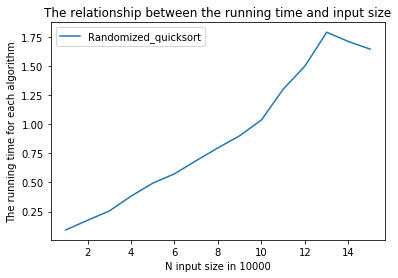

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [i for i in range(1,16)]

fig, ax = plt.subplots()

ax.plot(x,runtime, label="Randomized_quicksort")

ax.set_xlabel('N input size in 10000')
ax.set_ylabel('The running time for each algorithm')
ax.set_title('The relationship between the running time and input size')

leg = ax.legend();

## Question 4.

### Question 4a.

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [15]:
eps = 1e-16
locations = [0.0, 0.5, 1.0 - eps]
def qsort(lst):
    
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a <= partition]
        upper = [a for a in lst[frm:to] if a > partition]

        ind1 = frm + len(lower)
        #ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        #lst[ind1:ind2] = [partition] * counts
        lst[ind1:to] = upper

        # Enqueue other locations
        indices.append((frm, to))
        indices.append((ind1, to))
    return lst
    raise NotImplementedError()

In [16]:
print(qsort([4,2,1])==[1,2,4])
print(qsort([0])==[0])

KeyboardInterrupt: 

In [12]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

KeyboardInterrupt: 

### Question 4b.

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Question 5.

### Question 5a.

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [ ]:
def qsort(lst):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b.

Does this change the running time of your algorithm? Justify your response with a graph. 



In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Part B. Recursive quicksort. 

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


YOUR ANSWER HERE